In [1]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
X = iris.data 
y = iris.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Now we have to pre-process data, and the prescribed way to do it in the assignment documentation is through three ways, relating to the feature variables. Now before doing that we need to split the data in a 60-40 ratio which has been done above. So now we need to look at the following:

1) Unprocessed data
2) Min/Max Normalized data
3) Standardized data

In [11]:
import numpy as np

# minimizing and maximising
train_min = np.min(X_train, axis=0)
train_max = np.max(X_train, axis=0)
# since we used a numpy feature, numpy handled the vectorization automatically, so we don't need to explicitly process each feature individually. 
X_train_norm = (X_train-train_min)/(train_max-train_min) # from the formula in the doc.
X_test_norm = (X_test-train_min)/(train_max-train_min)
# now why are we using train_min, train_max even for X_test_norm: Calculating normalization or standardization parameters using the 
# test data introduces knowledge of the test set into your model, invalidating the evaluation.

# Similarly we need to do the same for standardization:
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train_std = (X_train - train_mean)/train_std
X_test_std = (X_test - train_mean)/train_std

Implement Softmax Function

In [13]:
# now we need to define the softmax function, which transforms these into probabilities that sum up tp 1,
# unsuring each output is within [0,1]. It is also essential to avoid numeric overflow.
from sklearn.preprocessing import OneHotEncoder
# One-hot encoding of labels
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1,1))

import numpy as np

def softmax(logits):
    # logits shape: (n_samples, n_classes)
    # shift logits by subtracting maximum value in each row for numerical stability
    exp_logits = np.exp(logits-np.max(logits, axis=1, keepdims=True))
    # next we need to calculate softmax probabilities
    probabilities = exp_logits/np.sum(exp_logits, axis=1, keepdims=True)

    return probabilities

Implement Multiclass Logistic Regression

In [15]:
# Cross-entropy loss implementation
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true*np.log(y_pred), axis=1))

# gradient descent implementation
def gradient_descent(X, y_true, alpha=0.1, epochs=500):
    m, n_features = X.shape
    n_classes = y_true.shape[1]
    theta = np.zeros((n_features, n_classes))
    loss_history = []

    for epoch in range(epochs):
        logits = X @ theta
        probs = softmax(logits)
        loss = cross_entropy(y_true, probs)
        gradient = (1/m)*X.T @ (probs - y_true)
        theta -= alpha*gradient
        loss_history.append(loss)

    return theta, loss_history



Train the Model

In [16]:
# training the model using the normalized features.
alpha = 0.1
epochs = 500 
theta, loss_history = gradient_descent(X_train_norm, y_train_onehot, alpha, epochs)

# evaluate the model:
logits_test = X_test_norm @ theta
probs_test = softmax(logits_test)
y_pred = np.argmax(probs_test, axis=1)

Evaluate the Model and Visualize the training performance

Accuracy: 0.6833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.00      0.00      0.00        19
           2       0.49      1.00      0.65        18

    accuracy                           0.68        60
   macro avg       0.50      0.67      0.55        60
weighted avg       0.53      0.68      0.58        60

Confusion Matrix:
 [[23  0  0]
 [ 0  0 19]
 [ 0  0 18]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

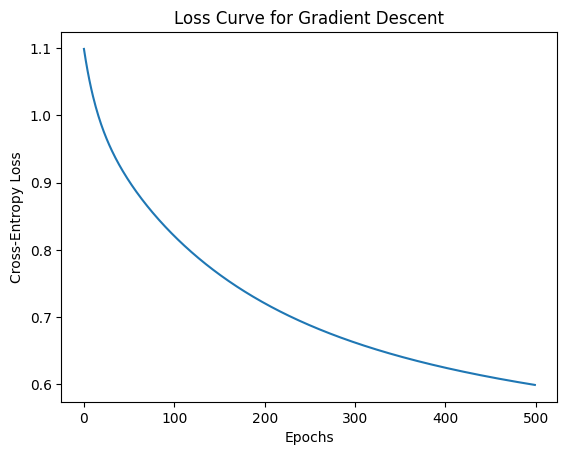

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the training loss curve
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss Curve for Gradient Descent')
plt.show()